In [1]:
# Importing the libraries

# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Important sklearn libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [2]:
# Importing the data
data = pd.read_excel('airline_dataset.xlsx')

# Data Sample
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Dimensions of data
data.shape

(10683, 11)

In [4]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Preprocessing

In [5]:
# Checking for duplicated values
data.duplicated().sum()

220

In [6]:
# Checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping duplicated and null values
data_no_duplies = data.drop_duplicates(keep='first')

data_no_duplies.dropna(inplace=True)

In [8]:
data_no_duplies.shape

(10462, 11)

In [9]:
# Checking for airlines in the dataset
data_no_duplies['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [10]:
# Seperating day, month and year form 'Date_of_Journey'
data_no_duplies['journey_day'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.day
data_no_duplies['journey_month'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.month
data_no_duplies['journey_year'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.year

In [11]:
# Checking the information of the new dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [12]:
# Checking for the number of years
data_no_duplies['journey_year'].value_counts() 

journey_year
2019    10462
Name: count, dtype: int64

In [13]:
# Seperating hours and minutes from 'Dep_Time' and 'Arrival_Time'

# 'Dep_Time' into hours and minutes
data_no_duplies['Dep_hour'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.hour
data_no_duplies['Dep_minute'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.minute

# 'Arrival_Time' into hours and minutes
data_no_duplies['Arrival_hour'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.hour
data_no_duplies['Arrival_minute'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.minute

In [14]:
# Checking the information about the dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
 14  Dep_hour         10462 non-null  int32 
 15  Dep_minute       10462 non-null  int32 
 16  Arrival_hour     10462 non-null  int32 
 17  Arrival_minute   10462 non-null  int

In [15]:
# Now seperting hours and minutes in 'Duration'
duration = list(data_no_duplies['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [16]:
# Creating new columns from 'Duration' 
data_no_duplies['Duration_hours'] = duration_hours
data_no_duplies['Duration_minutes'] = duration_minutes

In [17]:
# Checking the information about the columns
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Date_of_Journey   10462 non-null  object
 2   Source            10462 non-null  object
 3   Destination       10462 non-null  object
 4   Route             10462 non-null  object
 5   Dep_Time          10462 non-null  object
 6   Arrival_Time      10462 non-null  object
 7   Duration          10462 non-null  object
 8   Total_Stops       10462 non-null  object
 9   Additional_Info   10462 non-null  object
 10  Price             10462 non-null  int64 
 11  journey_day       10462 non-null  int32 
 12  journey_month     10462 non-null  int32 
 13  journey_year      10462 non-null  int32 
 14  Dep_hour          10462 non-null  int32 
 15  Dep_minute        10462 non-null  int32 
 16  Arrival_hour      10462 non-null  int32 
 17  Arrival_minute   

In [18]:
# Dropping the columns to form a new dataset
data_1 = data_no_duplies.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'journey_year', 'Route', 'Additional_Info'], axis=1)

In [19]:
# Cheking the information about the new dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  object
 4   Price             10462 non-null  int64 
 5   journey_day       10462 non-null  int32 
 6   journey_month     10462 non-null  int32 
 7   Dep_hour          10462 non-null  int32 
 8   Dep_minute        10462 non-null  int32 
 9   Arrival_hour      10462 non-null  int32 
 10  Arrival_minute    10462 non-null  int32 
 11  Duration_hours    10462 non-null  int64 
 12  Duration_minutes  10462 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 899.1+ KB


In [20]:
# Data Sample
data_1.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# EDA

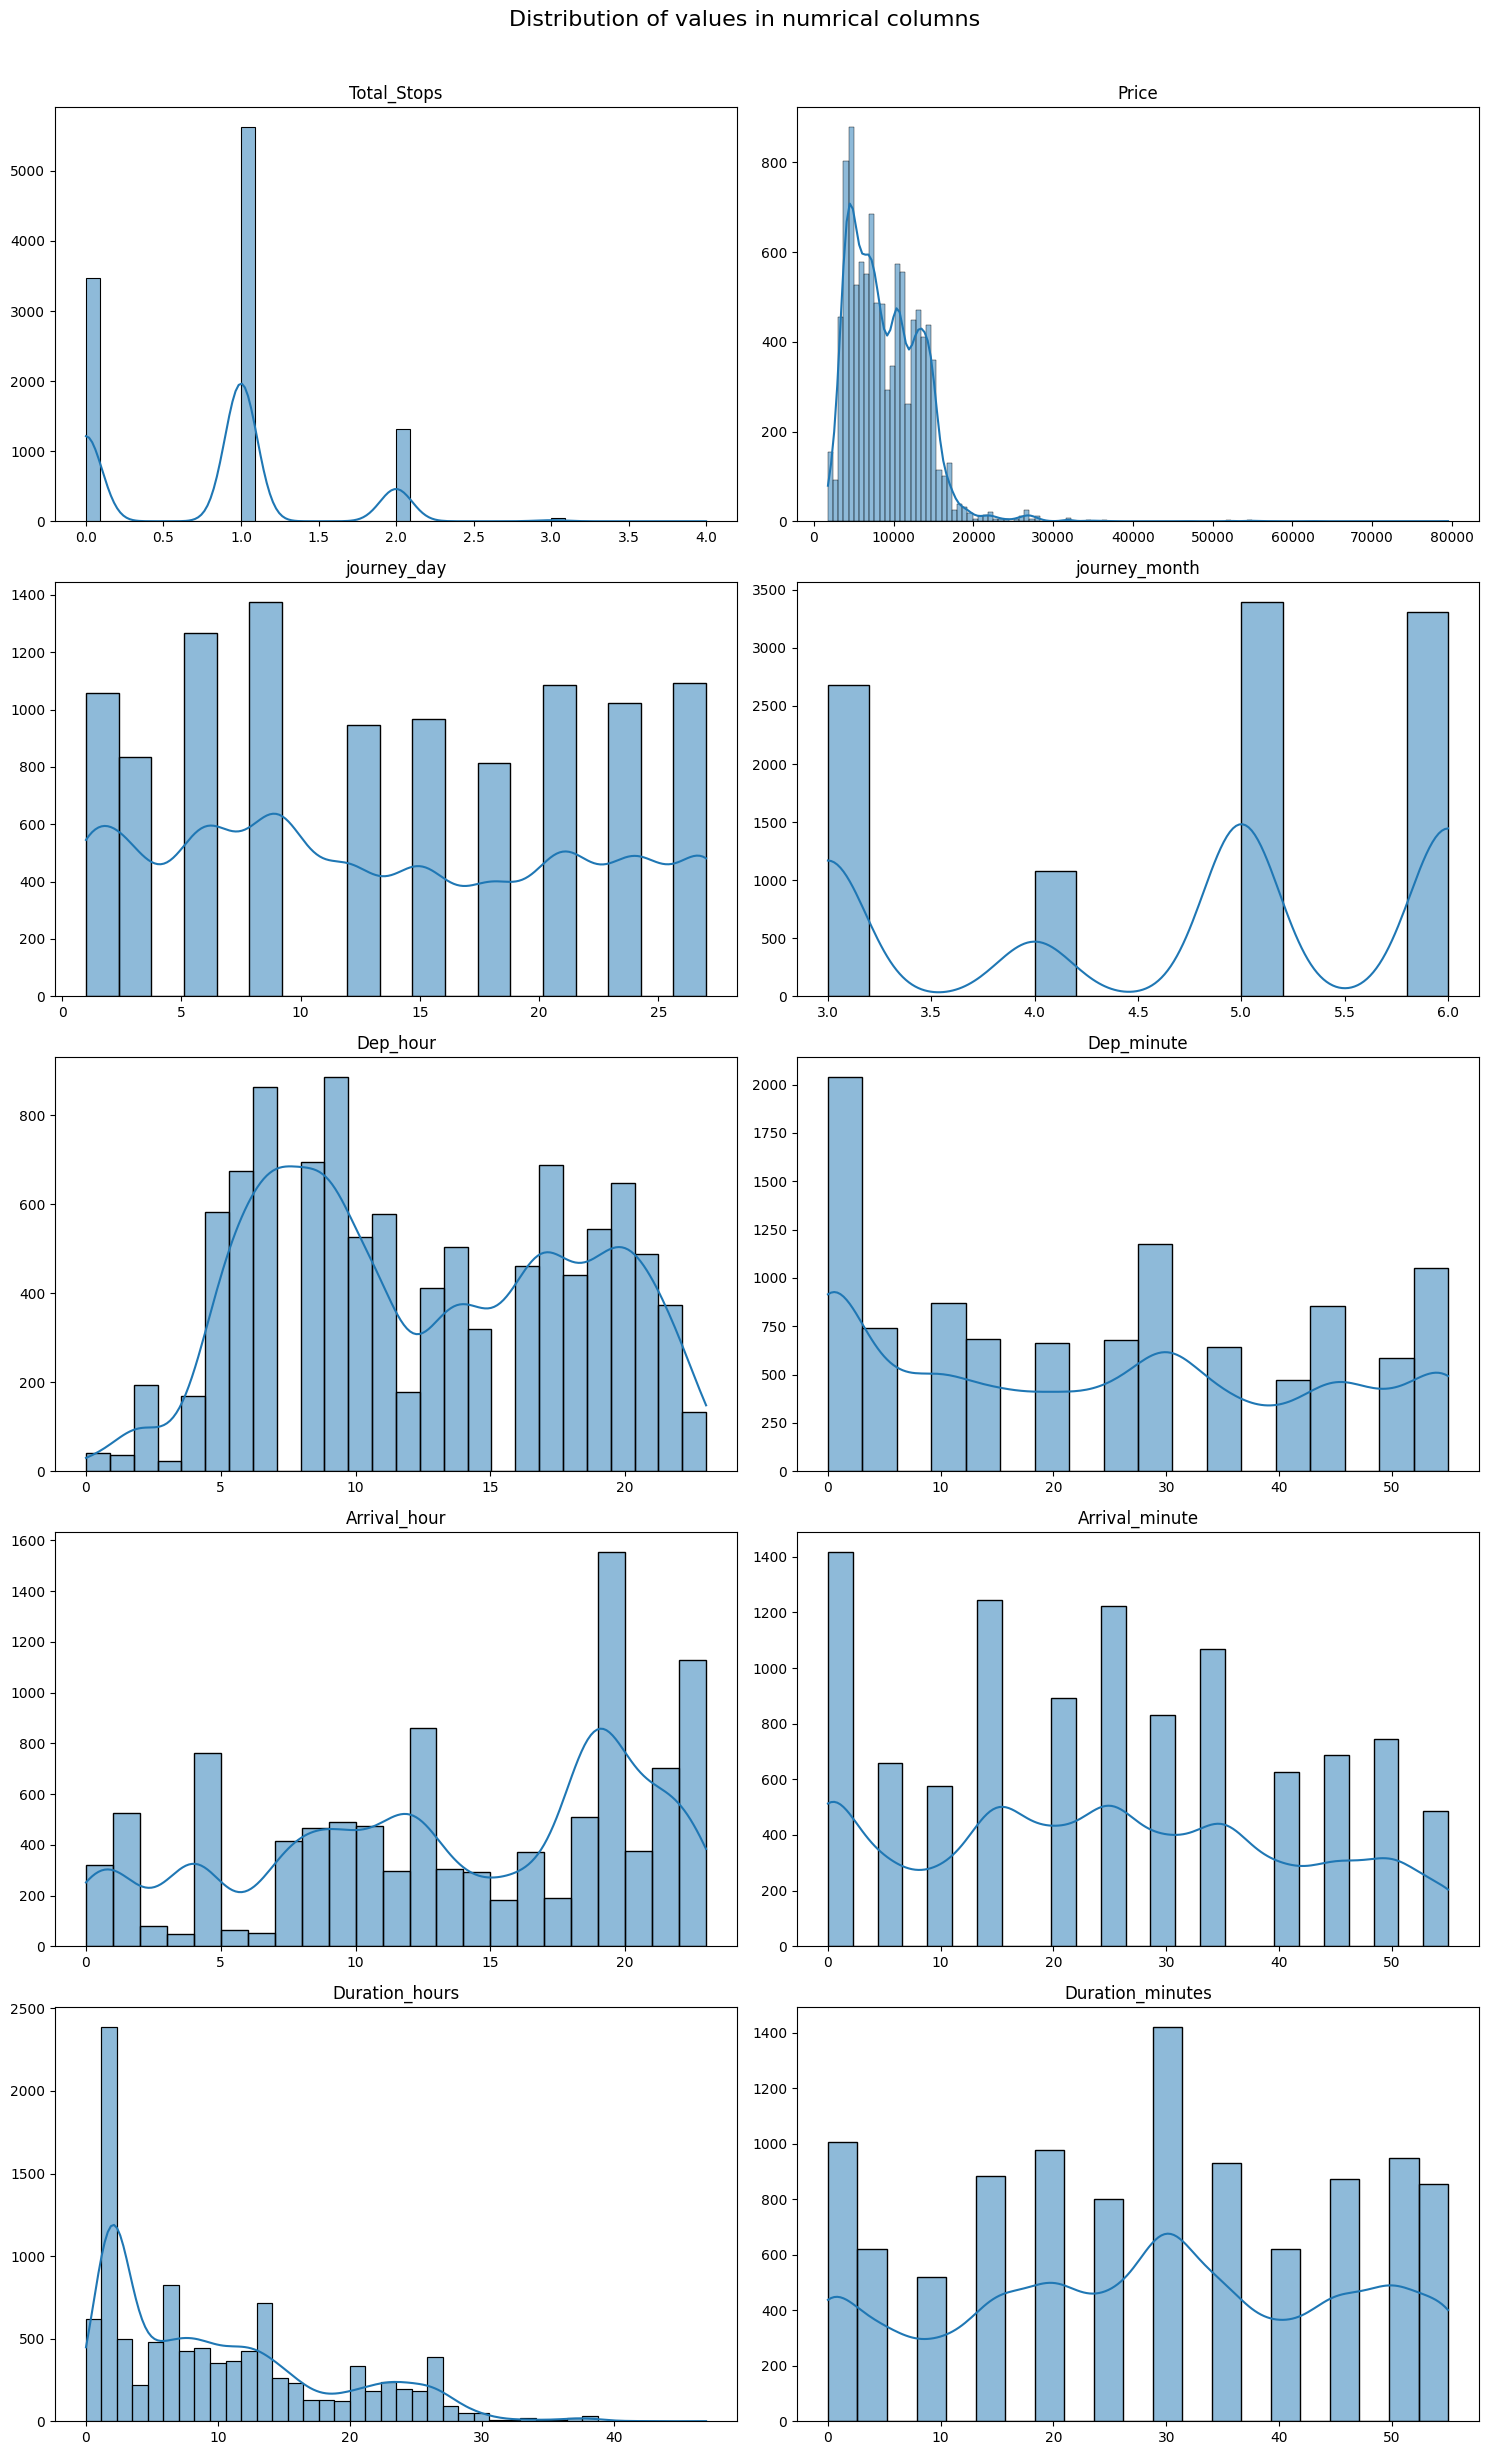

In [76]:
# Distribution of values in numrical columns
numerical_columns = data_1.select_dtypes(['int', 'float']).columns.tolist()

# Width and Height
num_of_plots_n = len(numerical_columns)
n_rows_num = int(np.ceil(num_of_plots_n / 2))

# Setting up subplots and it's axes
histplots, axes_num = plt.subplots(n_rows_num, 2, figsize=(15, 25))
histplots.suptitle('Distribution of values in numrical columns', fontsize=16)
axes_num = axes_num.flatten()

# Creating histplots
for i in range(len(numerical_columns)):
    ax_num = sns.histplot(data=data_1, x=numerical_columns[i], kde=True, ax=axes_num[i])
    ax_num.set_title(numerical_columns[i], fontsize=12)
    ax_num.set_xlabel('')
    ax_num.set_ylabel('')

# To remove empty axes in the plots
for j in range(len(numerical_columns), len(axes_num)):
    axes_num[j].axis('off')

# Setting the layout of the plot
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Saving the image
plt.savefig('images/Distribution_of_numerical_columns.png')

# Displaying the plot
plt.show()

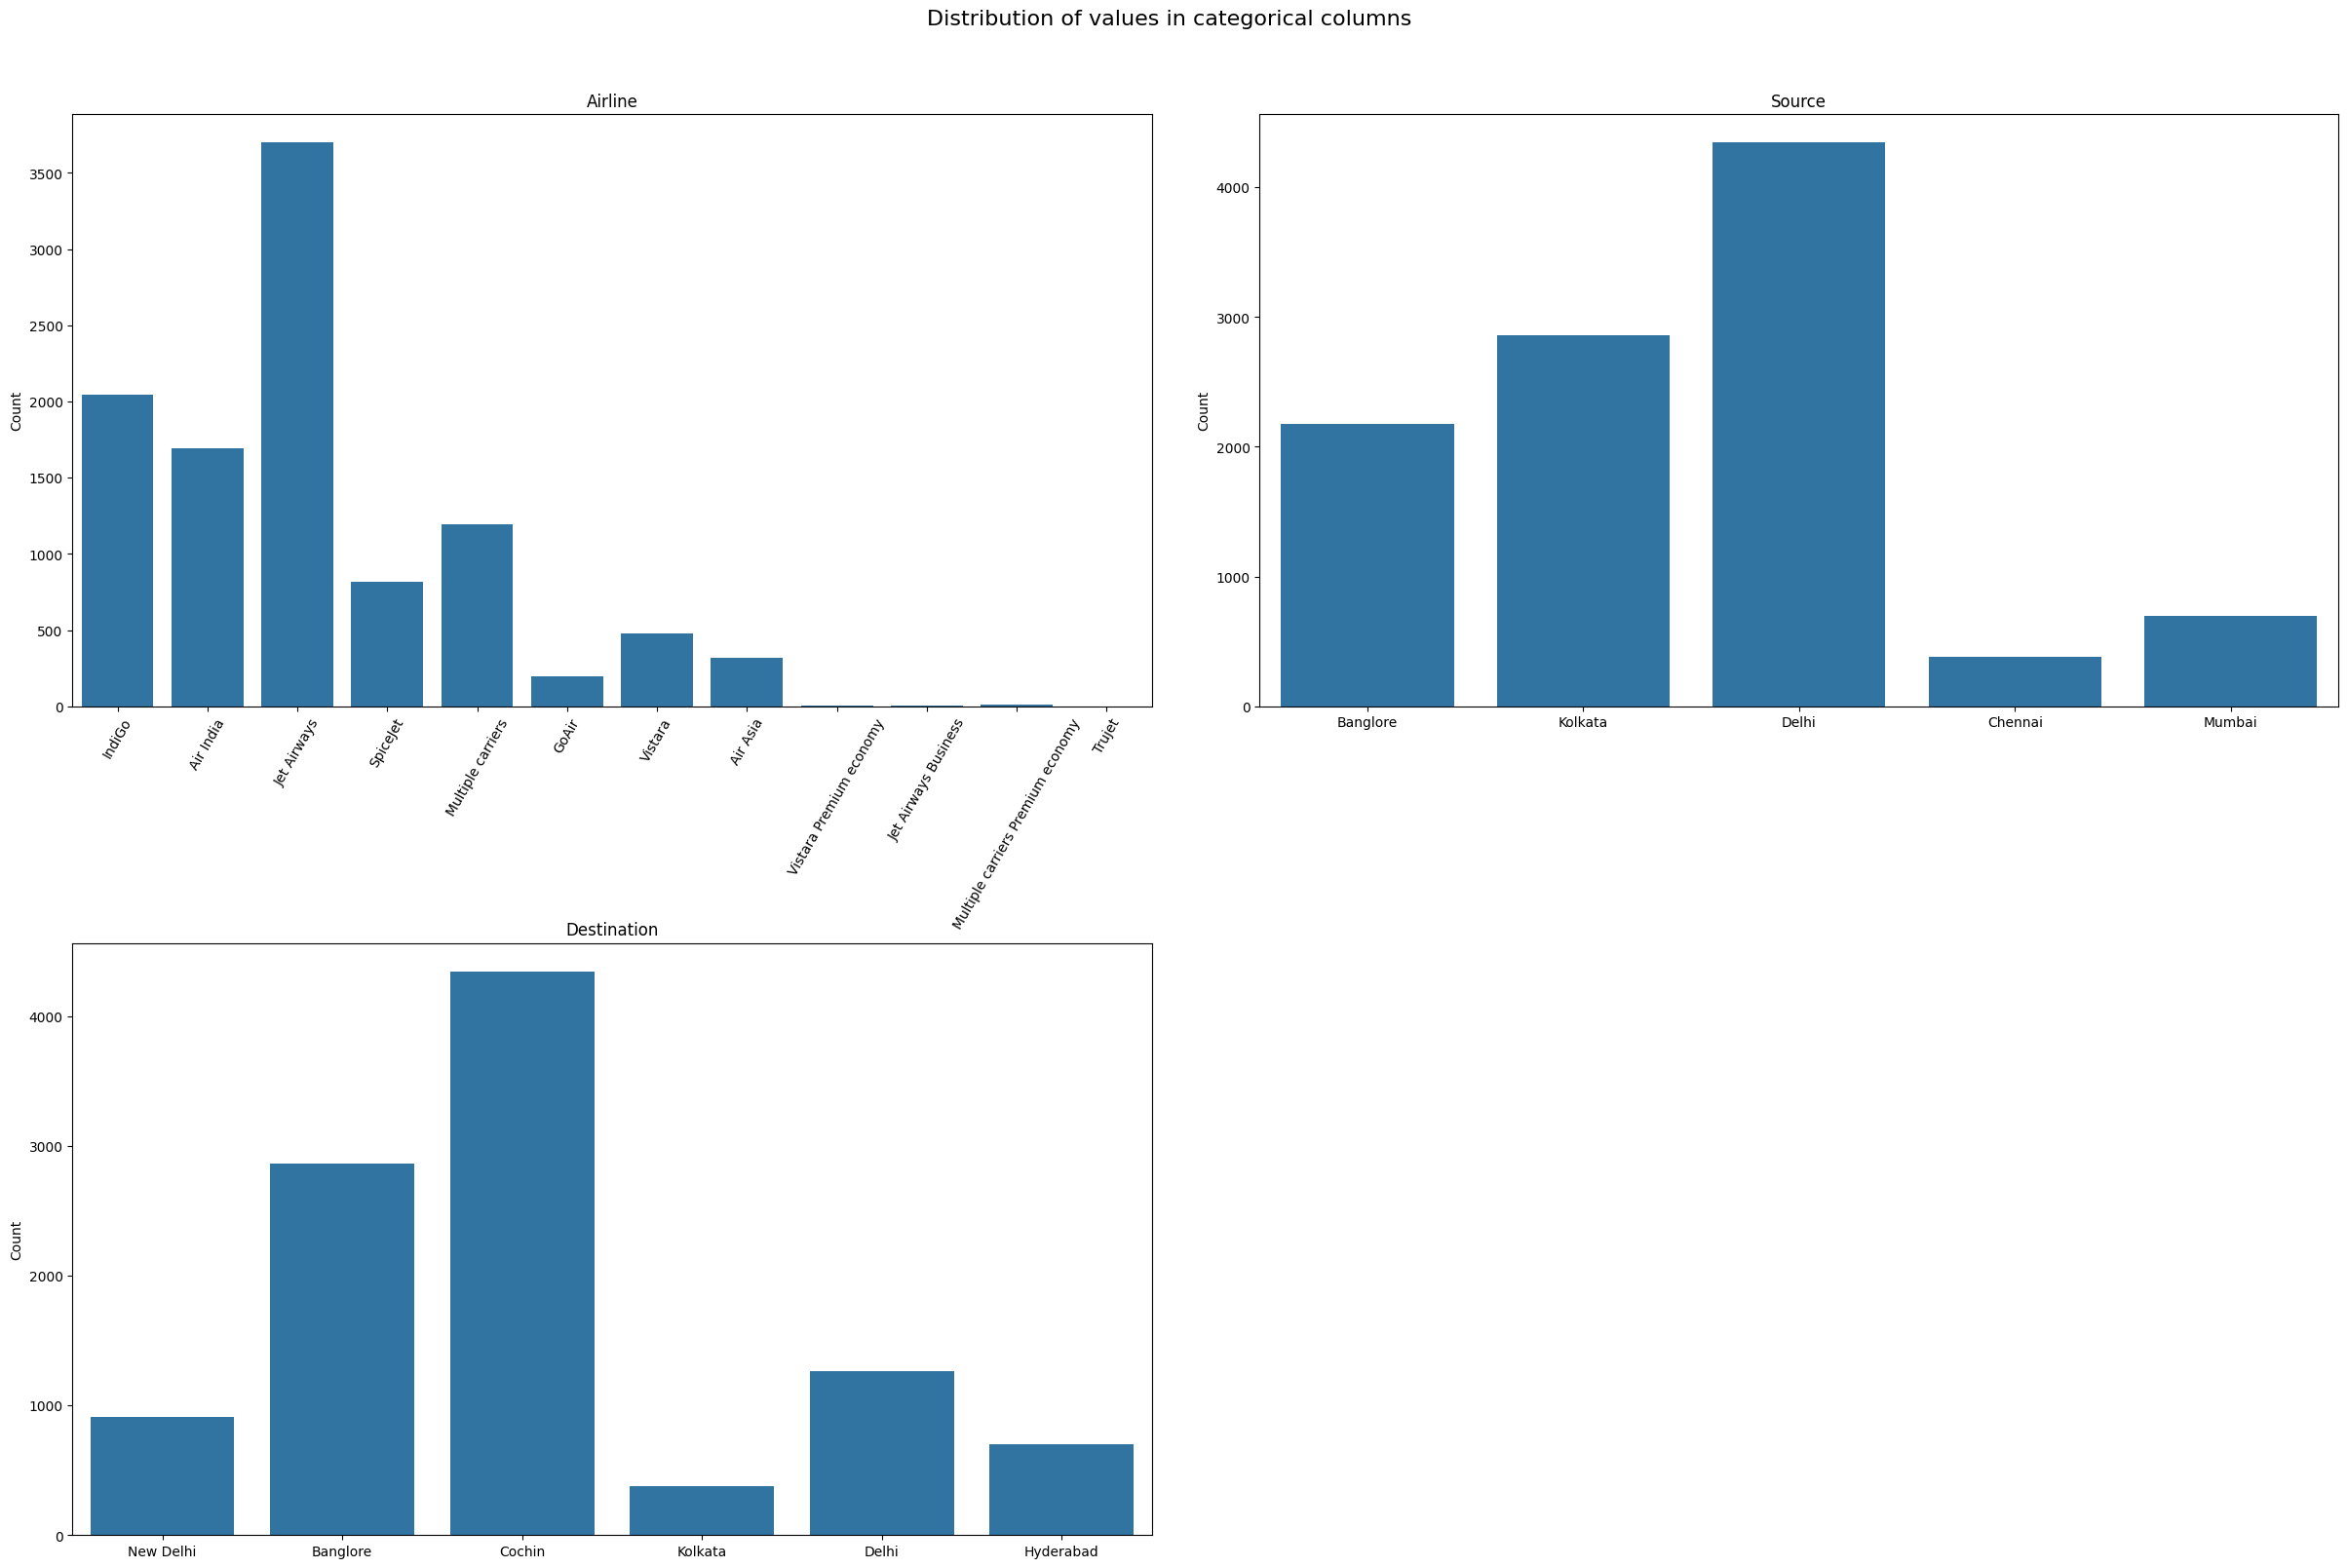

In [77]:
# Distribution of values in categorical columns
categorical_columns = data_1.select_dtypes(['object']).columns.tolist()

# Width and Height
num_of_plots_c = len(categorical_columns)
n_rows_cat = int(np.ceil(num_of_plots_c / 2))

# Setting up subplots and it's axes
countplots, axes_cat = plt.subplots(n_rows_cat, 2, figsize=(30, 18))
countplots.suptitle('Distribution of values in categorical columns', fontsize=16)
axes_cat = axes_cat.flatten()

# Creating countplots
for i in range(num_of_plots_c):
    ax_cat = sns.countplot(data=data_1, x=categorical_columns[i], ax=axes_cat[i])
    ax_cat.set_title(categorical_columns[i], fontsize=12)

    if categorical_columns[i] == 'Airline':
        ax_cat.tick_params(axis='x', rotation=60)

    ax_cat.set_xlabel('')
    ax_cat.set_ylabel('Count')

# To remove axes in the empty plots
for j in range(len(categorical_columns), len(axes_cat)):
    axes_cat[j].axis('off')

# Setting the layout of the plot
countplots.subplots_adjust(top=0.92, wspace=0.1, hspace=0.4)

# Saving the plot
plt.savefig('images/Distribution_of_categorical_columns.png', bbox_inches='tight')

# Displaying the plot
plt.show()

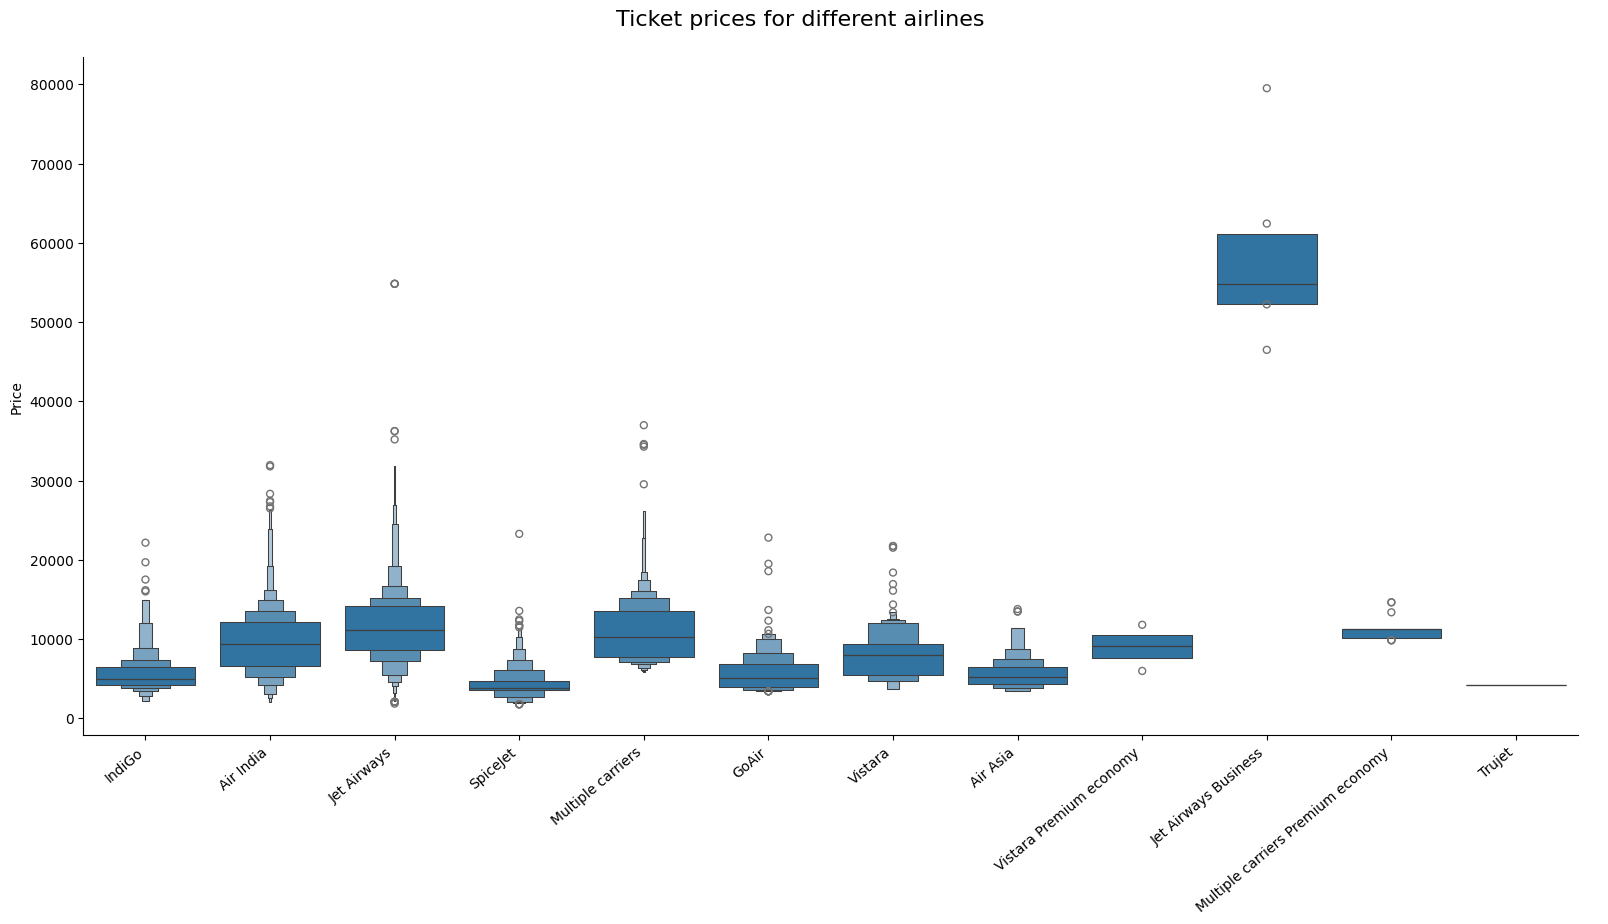

In [78]:
# Catplot to see prices according to airline 
catplot_1 = sns.catplot(data=data_1, x='Airline', y='Price', kind='boxen', height=8, aspect=2)
catplot_1.figure.suptitle('Ticket prices for different airlines', fontsize=16)
catplot_1.figure.subplots_adjust(top=0.92)
catplot_1.set_xticklabels(rotation=40, ha='right')
catplot_1.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_airlines.png', bbox_inches='tight')
plt.show()

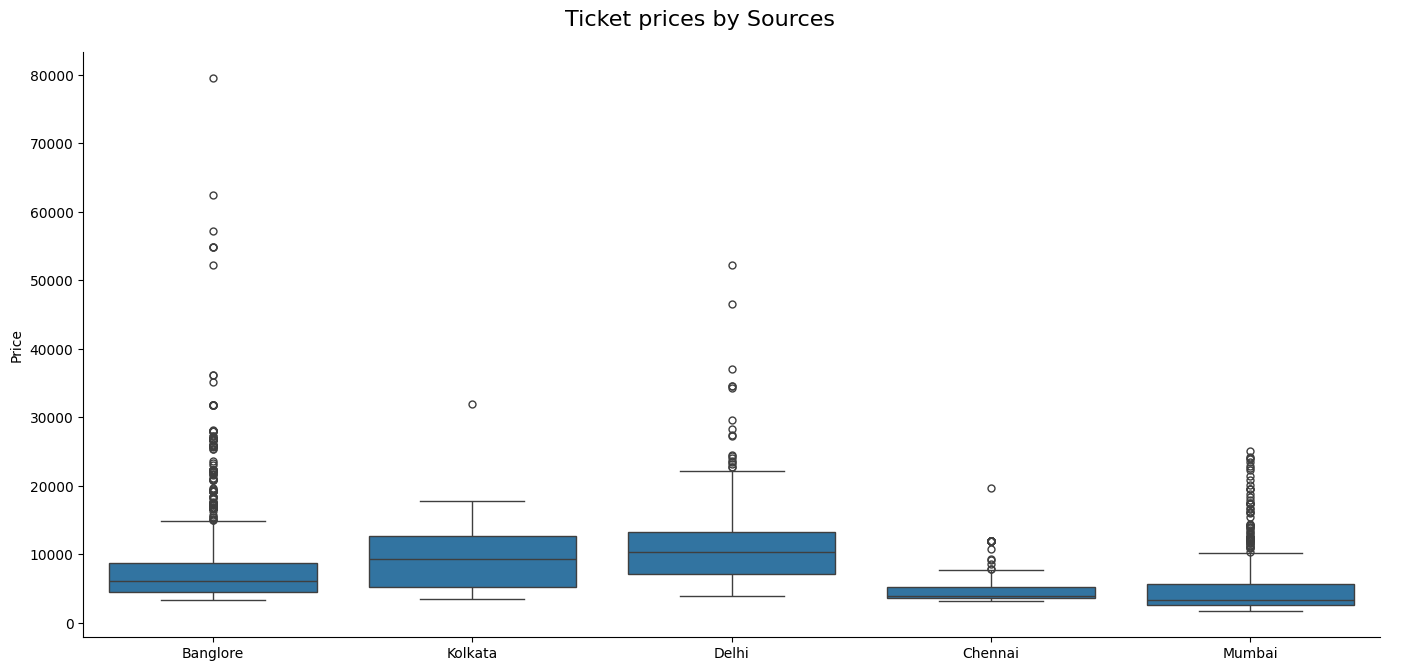

In [79]:
# Catplot to compare prices according to the source of the flight
catplot_2 = sns.catplot(data=data_1, x='Source', y='Price', kind='box', height=7, aspect=2)
catplot_2.figure.suptitle('Ticket prices by Sources', fontsize=16)
catplot_2.figure.subplots_adjust(top=0.92)
catplot_2.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_sources.png')
plt.show()

<Figure size 640x480 with 0 Axes>

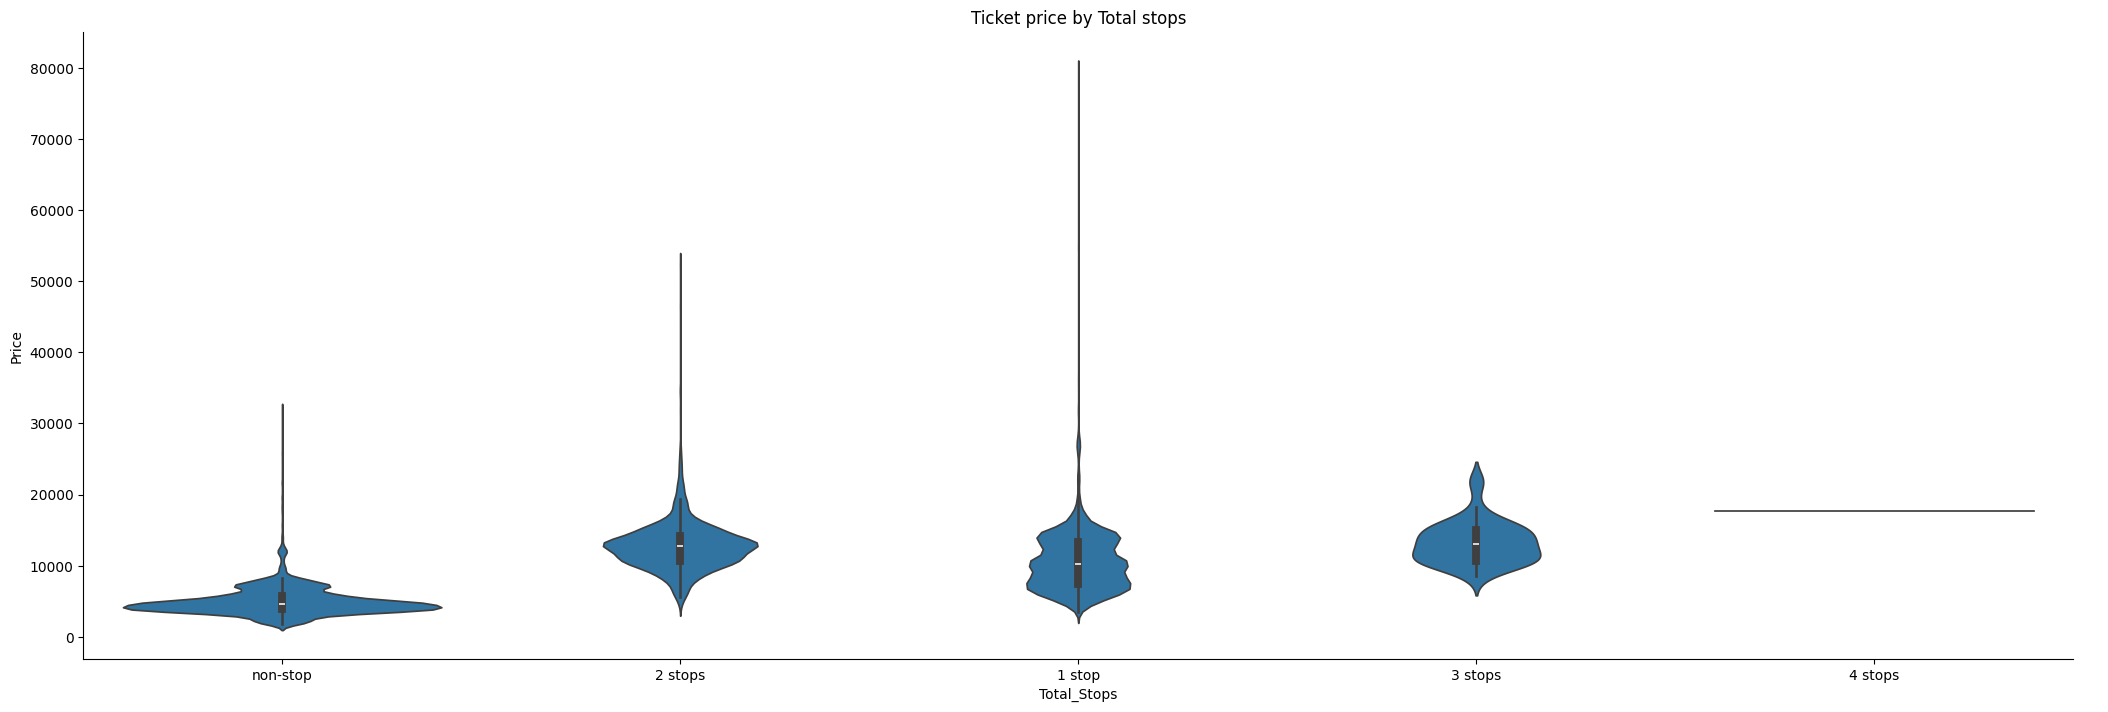

In [ ]:
# Catplot for comparing prices from different type of stops
catplot_3 = sns.catplot(data=data_1, x='Total_Stops', y='Price', kind='violin', height=7, aspect=2)
catplot_3.figure.suptitle('Ticket price by Total stops', fontsize=16)
catplot_3.figure.subplots_adjust(top=0.94)
catplot_3.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_total_stops.png')
plt.show()

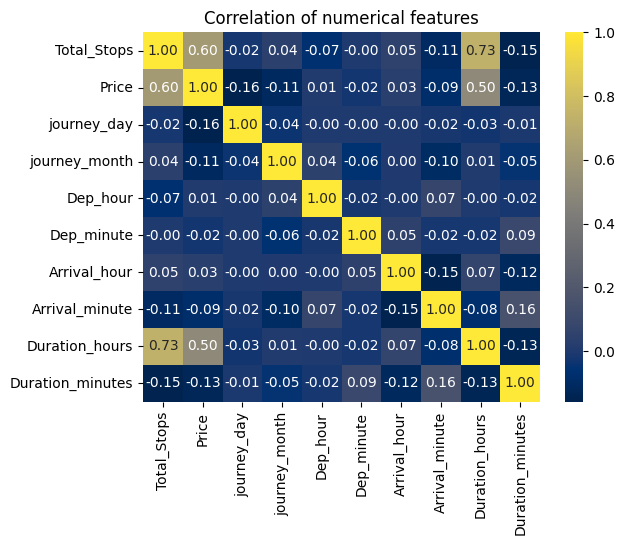

In [80]:
# Correaltion Matrix for numerical features
num_features = data_1.select_dtypes(include=['int', 'float']).columns.tolist()

corr_matrix = data_1[num_features].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation of numerical features')
plt.savefig('images/Correlation_matrix.png', bbox_inches='tight')
plt.show()

In [27]:
corr_matrix

,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
Price,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664
journey_day,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244
journey_month,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325
Dep_hour,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843
Dep_minute,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269
Arrival_hour,0.031023,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687
Arrival_minute,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176
Duration_hours,0.504200,-0.029382,0.006410,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999
Duration_minutes,-0.131664,-0.009244,-0.046325,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000


In [28]:
data_1['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [29]:
data_1['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [30]:
data_1['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [31]:
data_1['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [32]:
# Encoding the data

# Encoding the column 'Total_Stops'
data_1['Total_Stops'] = data_1['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Encoding the other categorical columns
cat_columns = data_1.select_dtypes(include='object').columns.tolist()
rest_columns = data_1.drop(cat_columns, axis=1).columns.tolist()
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype='int', handle_unknown='ignore')
data_1_encoded = pd.DataFrame(ohe.fit_transform(data_1[cat_columns]), index=data_1.index, columns=ohe.get_feature_names_out())
data_final = pd.concat([data_1_encoded, data_1[rest_columns]], axis=1)

# Data Sample
data_final.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45


# Train test and Dependency split

In [33]:
# Dependency split
X = data_final.drop('Price', axis=1)
Y = data_final['Price']

# Dimensions of the data
print(X.shape)
print(Y.shape)

(10462, 29)
(10462,)


In [34]:
# Data Sample
X.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,1,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,3,16,50,21,35,4,45


In [35]:
# Data Sample 'Y'
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [36]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Dimensions of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8369, 29)
(8369,)
(2093, 29)
(2093,)


In [37]:
# Data samples
x_train.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,0,0,0,1,0,0,0,0,0,0,...,0,1,1,4,18,55,9,20,14,25
4810,1,0,0,0,0,0,0,0,0,0,...,0,2,6,6,10,0,5,25,19,25
9046,0,0,0,0,0,0,0,0,0,0,...,0,2,24,5,15,10,23,30,8,20
7550,0,0,0,0,0,1,0,0,0,0,...,0,1,15,5,6,0,19,15,13,15
266,0,0,1,0,0,0,0,0,0,0,...,0,1,24,6,11,25,1,30,14,5


In [38]:
y_train.head()

3154     7064
4810    13007
9046     5192
7550     8266
266      5684
Name: Price, dtype: int64

In [39]:
x_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,0,0,0,0,0,0,0,1,0,0,...,0,0,27,3,6,55,9,35,2,40
9830,0,0,1,0,0,0,0,0,0,0,...,0,1,15,4,7,35,16,10,8,35
1506,0,0,0,0,0,0,0,1,0,0,...,0,0,1,4,22,20,0,40,2,20
4587,0,0,1,0,0,0,0,0,0,0,...,0,0,3,3,14,30,17,35,3,5
8189,0,0,0,1,0,0,0,0,0,0,...,1,1,12,3,7,0,23,0,16,0


In [40]:
y_test.head()

3017     3815
9830     6442
1506     3873
4587     7673
8189    13817
Name: Price, dtype: int64

In [41]:
# Scaling the training columns
scaler_train = StandardScaler()

# Implementing StandardScaler
x_train_scaled = pd.DataFrame(scaler_train.fit_transform(x_train), index=x_train.index, columns=scaler_train.get_feature_names_out())

# Data Sample
x_train_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,-1.473304,-0.599144,0.966414,1.633190,-0.635450,-0.284844,0.471312,-0.186959
4810,2.250443,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,1.798602,-0.885098,1.119826,-0.428205,-1.298464,-1.218525,0.015013,1.065850,-0.186959
9046,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,1.798602,1.232441,0.260341,0.443432,-0.765436,1.405312,0.314869,-0.242135,-0.483802
7550,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,2.778076,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,0.173671,0.260341,-1.125515,-1.298464,0.822237,-0.584700,0.352404,-0.780645
266,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,1.232441,1.119826,-0.253878,0.034106,-1.801600,0.314869,0.471312,-1.374332


In [42]:
# Scaling the test data
# scaler_test = StandardScaler()

# Implemented StandardScaler
x_test_scaled = pd.DataFrame(scaler_train.transform(x_test), index=x_test.index, columns=scaler_train.get_feature_names_out())

# Data Sample
x_test_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,0.0,-0.215679,...,-0.309363,-1.213103,1.585365,-1.458629,-1.125515,1.633190,-0.635450,0.614725,-0.955581,0.703571
9830,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,0.173671,-0.599144,-0.951187,0.567134,0.384931,-0.884556,-0.242135,0.406727
1506,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,0.0,-0.215679,...,-0.309363,-1.213103,-1.473304,-0.599144,1.663724,-0.232408,-1.947369,0.914581,-0.955581,-0.483802
4587,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,-1.213103,-1.238022,-1.458629,0.269104,0.300620,0.530700,0.614725,-0.836673,-1.374332
8189,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,3.232445,0.292750,-0.179252,-1.458629,-0.951187,-1.298464,1.405312,-1.484269,0.709127,-1.671175


In [43]:
x_train_scaled.shape

(8369, 29)

In [44]:
x_test_scaled.shape

(2093, 29)

# Model Building

## Raw Performance

In [69]:
# Evaluating raw performance of models

# Linear Regression
lr_model = LinearRegression(positive=True)
lr_model.fit(x_train_scaled, y_train)
lr_train_score = round(lr_model.score(x_train_scaled, y_train)*100, 2)
lr_test_score = round(lr_model.score(x_test_scaled, y_test)*100, 2)

# Lasso Regressor
lasso_model = Lasso()
lasso_model.fit(x_train_scaled, y_train)
lasso_train_score = round(lasso_model.score(x_train_scaled, y_train)*100, 2)
lasso_test_score = round(lasso_model.score(x_test_scaled, y_test)*100, 2)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=37)
dt_model.fit(x_train_scaled, y_train)
dt_train_score = round(dt_model.score(x_train_scaled, y_train)*100, 2)
dt_test_score = round(dt_model.score(x_test_scaled, y_test)*100, 2)

# Extra Trees Regressor
et_model = ExtraTreesRegressor(n_jobs=-1, random_state=32)
et_model.fit(x_train_scaled, y_train)
et_train_score = round(et_model.score(x_train_scaled, y_train)*100, 2)
et_test_score = round(et_model.score(x_test_scaled, y_test)*100, 2)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=47, n_jobs=-1)
rf_model.fit(x_train_scaled, y_train)
rf_train_score = round(rf_model.score(x_train_scaled, y_train)*100, 2)
rf_test_score = round(rf_model.score(x_test_scaled, y_test)*100, 2)

# Ada Boost Regressor
ada_model = AdaBoostRegressor(estimator=dt_model, random_state=16)
ada_model.fit(x_train_scaled, y_train)
ada_train_score = round(ada_model.score(x_train_scaled, y_train)*100, 2)
ada_test_score = round(ada_model.score(x_test_scaled, y_test)*100, 2)

# LightGBM Regressor
lgbm_model = LGBMRegressor(random_state=26, n_jobs=-1)
lgbm_model.fit(x_train_scaled, y_train)
lgbm_train_score = round(lgbm_model.score(x_train_scaled, y_train)*100, 2)
lgbm_test_score = round(lgbm_model.score(x_test_scaled, y_test)*100, 2)

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=18)
xgb_model.fit(x_train_scaled, y_train)
xgb_train_score = round(xgb_model.score(x_train_scaled, y_train)*100, 2)
xgb_test_score = round(xgb_model.score(x_test_scaled, y_test)*100, 2)

# Support Vector Regressor
svm_model = SVR()
svm_model.fit(x_train_scaled, y_train)
svm_train_score = round(svm_model.score(x_train_scaled, y_train)*100, 2)
svm_test_score = round(svm_model.score(x_test_scaled, y_test)*100, 2)

# KNeighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)
knn_train_score = round(knn_model.score(x_train_scaled, y_train)*100, 2)
knn_test_score = round(knn_model.score(x_test_scaled, y_test)*100, 2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 8369, number of used features: 25
[LightGBM] [Info] Start training from score 9049.087705


In [70]:
# Collecting and storing the train and test scores
dict_scores = {
    'Models': ['Linear Regresssion', 'Lasso', 'Decision Tree', 'Extra Trees', 'Random Forest', 'Adaptive Boost', 'Light GBM', 'XGBoost', 'Support Vector Machine', 'KNeighbors'],
    'Train_score': [lr_train_score, lasso_train_score, dt_train_score, et_train_score, rf_train_score, ada_train_score, lgbm_train_score, xgb_train_score, svm_train_score, knn_train_score],
    'Test_score': [lr_test_score, lasso_test_score, dt_test_score, et_test_score, rf_test_score, ada_test_score, lgbm_test_score, xgb_test_score, svm_test_score, knn_test_score]
}

# Storing them in a dataframe
scores_data = pd.DataFrame(dict_scores)

# Data Sample
scores_data

,Models,Train_score,Test_score
0,Linear Regresssion,60.06,58.45
1,Lasso,62.54,61.02
2,Decision Tree,97.28,68.06
3,Extra Trees,97.28,76.53
4,Random Forest,95.52,79.77
5,Adaptive Boost,96.76,78.10
6,Light GBM,87.25,83.67
7,XGBoost,93.86,83.22
8,Support Vector Machine,5.24,7.02
9,KNeighbors,83.95,76.10


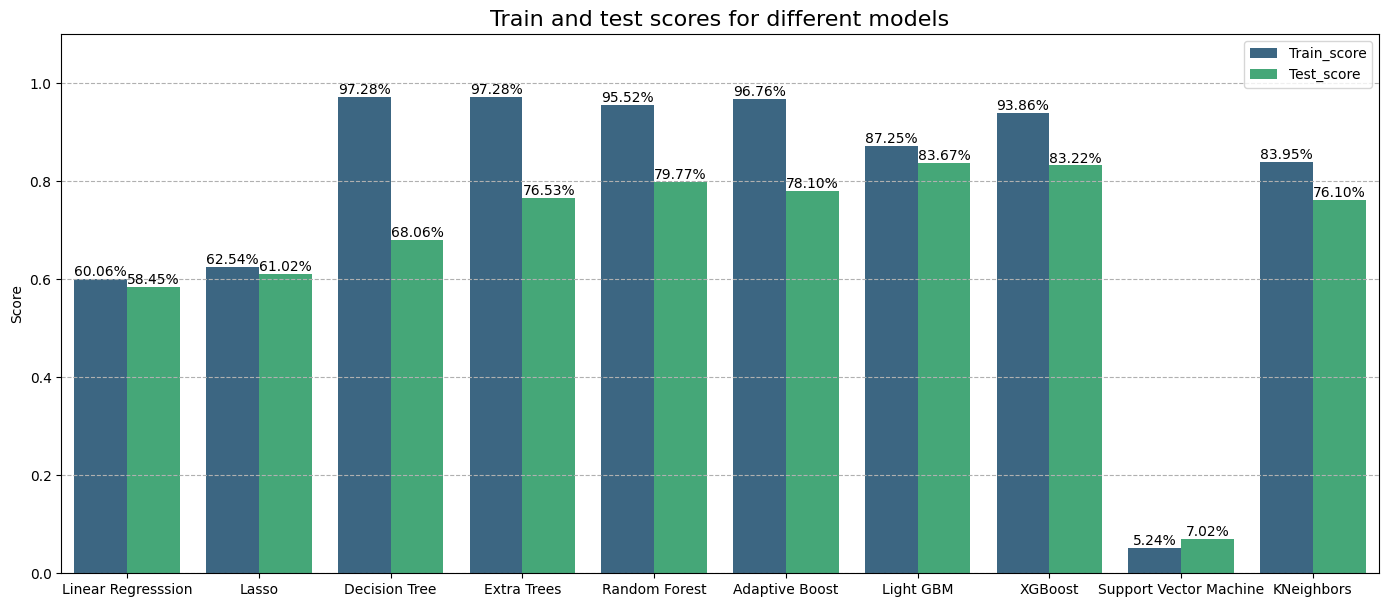

In [71]:
# Plotting all the scores

# Melting the 'scores' dataframe
melted_scores = scores_data.melt('Models', var_name='Score Type', value_name='Score')

# Creating a barchat to display scores of different models
plt.figure(figsize=(17, 7))
sns.barplot(x='Models', y=melted_scores['Score'] / 100, hue='Score Type', data=melted_scores, palette='viridis')

# Adding labels and title
plt.title('Train and test scores for different models', fontsize=16)
plt.xlabel('')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--')

# Adding percentage scores above the bars
ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            p.get_height(),
            f'{p.get_height():.2%}',
            color='black',
            ha='center',
            va='bottom'
        )

# Plotting the legend and the barplot
plt.legend()
plt.savefig('images/Training_Testing_Scores.png', bbox_inches='tight')
plt.show()

## Naive Bayes Models

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [74]:
# Evaluating raw performance of all Naive Bayes Models

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(x_train_scaled, y_train)
gnb_train_score = round(gnb_model.score(x_train_scaled, y_train)*100, 2)
y_pred_gnb = gnb_model.predict(x_test_scaled)
gnb_test_score = round(r2_score(y_test, y_pred_gnb)*100, 2)

# Multinomial Naive Bayes
#mnb_model = MultinomialNB()
#mnb_model.fit(x_train_scaled, y_train)
#mnb_train_score = round(mnb_model.score(x_train_scaled, y_train)*100, 2)
#mnb_test_score = round(mnb_model.score(x_test_scaled, y_test)*100, 2)

# Complement Naive Bayes
#cnb_model = ComplementNB()
#cnb_model.fit(x_train_scaled, y_train)
#cnb_train_score = round(cnb_model.score(x_train_scaled, y_train)*100, 2)
#cnb_test_score = round(cnb_model.score(x_test_scaled, y_test)*100, 2)

# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(x_train_scaled, y_train)
bnb_train_score = round(bnb_model.score(x_train_scaled, y_train)*100, 2)
y_pred_bnb = bnb_model.predict(x_test_scaled)
bnb_test_score = round(r2_score(y_test, y_pred_bnb)*100, 2)

# Categorical Naive Bayes
#cat_nb_model = CategoricalNB()
#cat_nb_model.fit(x_train_scaled, y_train)
#cat_nb_train_score = round(cat_nb_model.score(x_train_scaled, y_train)*100, 2)
#cat_nb_test_score = round(cat_nb_model.score(x_test_scaled, y_test)*100, 2)

In [75]:
# Displaying the scores

# Gaussian Naive Bayes
print('Gaussian Naive Bayes')
print('Train score:', gnb_train_score, '%')
print('Test score:', gnb_test_score, '%')

print('\n')
# Bernoulli Naive Bayes
print('Bernoulli Naive Bayes')
print('Train score:', bnb_train_score, '%')
print('Test score:', bnb_test_score, '%')

Gaussian Naive Bayes
Train score: 45.58 %
Test score: 59.84 %


Bernoulli Naive Bayes
Train score: 29.81 %
Test score: 38.08 %


## Evaluation Metrics

In [72]:
models = [lr_model, lasso_model, dt_model, et_model, rf_model, ada_model, lgbm_model, xgb_model, svm_model, knn_model,
          gnb_model, bnb_model]
names = ['Linear Regression', 'Lasso Regressor', 'Decision Tree Regressor', 'Extra Tress Regressor',
         'Random Forest Regressor', 'Ada Boost Regressor', 'LightGBM Regressor', 'XGBoost Regressor', 'Support Vector Regressor', 'KNeighbors Regressor',
         'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

print("Evaluation of all the models used: R2_Score, MAE, MSE, RMSE and MAPE\n\n")

for name, model in zip(names, models):
    print('---', name, '---')
    print('R2_Score:', r2_score(y_test, model.predict(x_test_scaled)))
    print('MAE:', mean_absolute_error(y_test, model.predict(x_test_scaled)))
    print('MSE:', mean_squared_error(y_test, model.predict(x_test_scaled)))
    print('RMSE:', root_mean_squared_error(y_test, model.predict(x_test_scaled)))
    print('MAPE:', mean_absolute_percentage_error(y_test, model.predict(x_test_scaled)))
    print('\n')

Evaluation of all the models used: R2_Score, MAE, MSE, RMSE and MAPE


--- Linear Regression ---
R2_Score: 0.5845484443326399
MAE: 1947.7922609976567
MSE: 7614505.980143867
RMSE: 2759.4394322296453
MAPE: 0.23627960769288228


--- Lasso Regressor ---
R2_Score: 0.6102454350560231
MAE: 1932.1123124672022
MSE: 7143524.73849082
RMSE: 2672.7373119127924
MAPE: 0.24181367581526883


--- Decision Tree Regressor ---
R2_Score: 0.6805792092438055
MAE: 1414.1011466794075
MSE: 5854428.725121304
RMSE: 2419.5926775226662
MAPE: 0.15846399414597298


--- Extra Tress Regressor ---
R2_Score: 0.7652986864092599
MAE: 1263.5351368052236
MSE: 4301667.7432187
RMSE: 2074.0462249474335
MAPE: 0.14127696364594053


--- Random Forest Regressor ---
R2_Score: 0.7977250105349232
MAE: 1220.1447689713668
MSE: 3707349.499368772
RMSE: 1925.4478698133512
MAPE: 0.13838994268828353


--- Ada Boost Regressor ---
R2_Score: 0.7810259050344721
MAE: 1223.04196784017
MSE: 4013415.121128166
RMSE: 2003.3509730269845
MAPE: 0.13720881